In [1]:
import os
import cv2
import base64
import numpy as np
import requests
import random
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [2]:
img_root = '/home/ariya/workspace/datasets/animals10-dvc/images/test'
img_class = random.choice(os.listdir(img_root))
img_dir = os.path.join(img_root, img_class)
img_file = random.choice(os.listdir(img_dir))
print(f'{img_class}/{img_file}')
img_path = os.path.join(img_dir, img_file)
ori_image = cv2.imread(img_path)

sheep/OIP-2XJu1gPGJ_bPXpXwFAiBxAHaFB.jpeg


In [3]:
service_host = 'nginx'
service_port = '80'

In [4]:
res = requests.post(f'http://{service_host}:{service_port}/predict/',
                    files={'file':open(img_path, 'rb')}
                    )
print(res.json())

{'model_name': 'animals10_classifier_50px_demo', 'prediction': {'butterfly': 0.07426953315734863, 'cat': 0.08151287585496902, 'chicken': 0.12683622539043427, 'cow': 0.09611776471138, 'dog': 0.18873809278011322, 'elephant': 0.06589160859584808, 'horse': 0.10645713657140732, 'sheep': 0.05800309777259827, 'spider': 0.12322857230901718, 'squirrel': 0.07894501835107803}, 'overlaid_img': 'iVBORw0KGgoAAAANSUhEUgAAASwAAADMCAIAAABGLAkUAAEAAElEQVR42kz9W5MlSZIeiOnVzP2c\niLzUrXume4GZwYBLrghJLBazACkUUkgR/oX9/49LAD1dlRlxjruZXvig5lGdUg9VmZURcdztovrp\nd8H/70//GyAAQCYAJCISMxIRYwKSSBJ4ZBKyKjIGAhBGAjGJChIHACKotufz+Tyet9u99zanReac\n0z1eXl4A4PF8ejgRISERJSQiMDFAQgISQqaZIXFEEBERRQQiEpGZjTFUlYgyExEBAAAQMSI8QlUB\nsn5vjJOIVJWZ3czcibB+sXBAZCYieaaZMQsTm/v1BSEhI4IYiQkyMbFpu91uv/32WwLw9eNFRGa6\nR4QjIIsQMVAC4vN8ErGqRkQC1P/cpLk7ZLq7ivbewyPCPdzd3I0QVQURIzwBhCkBkAiJEsDc6ztS\nEiFBgrtHBAAQESEl1GuEzGRmIs5Md0uAzITMzAyPzCREEmrazC08SJgQpxkAtNYIeZyTmRLg+XgA\nwL5tBAgI5iaizHSOMyJEpV4ZZDKzsCSkm2UEEQJgQhIAAqqKqJqZTWt9ezyeZi7CABAe

In [5]:
res = requests.put(f'http://{service_host}:{service_port}/update_model/animals10_classifierXD.yaml')
print(res.json())

{'message': 'Updating model failed due to failure in model loading method with path parameter: animals10_classifierXD.yaml'}


In [6]:
res = requests.put(f'http://{service_host}:{service_port}/update_model/resnet50_224px_animals10_classifier.yaml')
print(res.json())

{'message': 'Updating model failed due to failure in model loading method with path parameter: resnet50_224px_animals10_classifier.yaml'}


In [7]:
invalid_path = '/home/ariya/workspace/run_flow.py'
res = requests.post(f'http://{service_host}:{service_port}/predict/',
                    files={'file':open(invalid_path, 'rb')}
                    )
res = res.json()
res.keys()

dict_keys(['message'])

In [8]:
res = requests.post(f'http://{service_host}:{service_port}/predict/',
                    files={'file':open(img_path, 'rb')}
                    )
res = res.json()
res.keys()

dict_keys(['model_name', 'prediction', 'overlaid_img', 'raw_hm_img', 'message'])

In [9]:
raw_hm_bytes = res.pop('raw_hm_img')
overlaid_hm_bytes = res.pop('overlaid_img')
res

{'model_name': 'animals10_classifier_50px_demo',
 'prediction': {'butterfly': 0.07426953315734863,
  'cat': 0.08151287585496902,
  'chicken': 0.12683622539043427,
  'cow': 0.09611776471138,
  'dog': 0.18873809278011322,
  'elephant': 0.06589160859584808,
  'horse': 0.10645713657140732,
  'sheep': 0.05800309777259827,
  'spider': 0.12322857230901718,
  'squirrel': 0.07894501835107803},
 'message': 'Success'}

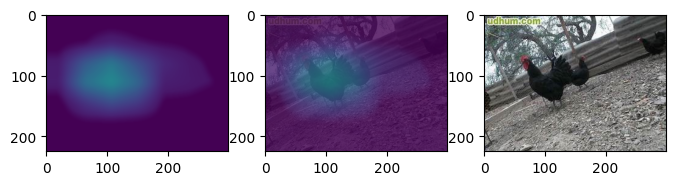

In [10]:
plt.figure(figsize=(8,8))


for idx, img_str in enumerate([raw_hm_bytes, overlaid_hm_bytes]):
    bytes_str = img_str.encode('utf-8')
    prediction_image_byte = base64.b64decode(bytes_str)
    prediction_image_arr = np.frombuffer(prediction_image_byte, dtype=np.uint8)
    prediction_image_arr = cv2.imdecode(prediction_image_arr,flags=cv2.IMREAD_COLOR)
    plt.subplot(1, 3, idx+1)
    plt.imshow(cv2.cvtColor(prediction_image_arr, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB))

plt.show()